# Smart Manufacturing

![Screenshot](images/throughput_time.JPG) 

Scenario: We have been given data from a spare parts manufacturing plant that uses Fabricating Machines, and skilled Operators to produce spare parts. These are small parts and they are produced in the 100's. The manufacturing plant wants to produce as many parts as possible quickly.

**Data:** We have given given 1 day's manufacturing data. There are 2 Machines (M1 and M2) and 5 human operators (O1...O5) and on this day 3 parts (P1, P2 and P3) were produced.

Both M1 and M2 have different rates of production, when they are running. However, they both require some set-up time, as well as `change over` time when switching between different parts. 

__Stoppages__ Throughout the day, these machines get stopped for various reasons. These NPT (non-productive times) are due to the following reasons:
1. Alarms (machine parts overheating, high vibrations)
2. Operator stops (humans stopping the machines, for taking a break, replacing raw etc.)
3. Change over (when switching from one Part to manufacturing another)



**Goal for this lesson**: Compare the throughputs of the different machines, compare part manufacturing difficulty and operator efficiencies, by looking at the data


![Screenshot](images/CumulativeFlow.png) 

### Preparatory Tasks

1. Read the input file
2. Format the data into a proper time series (with datetime) Timestamps and floats for the sensor values
3. Plot the number of parts produced with time as the x-axis (flat areas are stoppage times)

## Questions to be answered

- Q1: How does Machine M1 compare against M2 in terms of its production capacity?
- Q2: How do the 3 parts (P1, P2, P3) compare in terms of production complexity, based on this one day's data?
- Q3: How do the 5 operators compare, in terms of their individual production rates?
- Q4: What is the actual `realized` production rate, when taking into account all the stoppages?

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
%matplotlib inline

In [105]:
# load all files into separate dataframes
smart_data = pd.read_csv('smart_manufacturing_operator_machine_data.csv', encoding='utf-8')

In [106]:
# check data
smart_data.tail()

,Time,StopType,Operator,Part,NumberOfPieces,Machine
359,23:54:41.517850,Run,Op_4,P3,92537,M2
360,23:58:30.526797,Run,Op_5,P3,100101,M1
361,23:59:34.640609,Alarm,Op_4,P3,0,M2
362,1 day 0:01:50.038284,Alarm,Op_5,P3,0,M1
363,1 day 0:06:52.712210,OpStop,Op_4,P3,0,M2


In [107]:
# check for nulls
smart_data.isnull().sum()

Time              0
StopType          0
Operator          0
Part              0
NumberOfPieces    0
Machine           0
dtype: int64

In [108]:
#check column types
smart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364 entries, 0 to 363
Data columns (total 6 columns):
Time              364 non-null object
StopType          364 non-null object
Operator          364 non-null object
Part              364 non-null object
NumberOfPieces    364 non-null int64
Machine           364 non-null object
dtypes: int64(1), object(5)
memory usage: 17.1+ KB


In [109]:
# convert to time delta
smart_data['Time'] = pd.to_timedelta(smart_data['Time'])

In [110]:
# Index the dataframe
smart_data.index = smart_data['Time']

In [111]:
# Add a duration field
smart_data['Duration'] = (smart_data['Time']-smart_data['Time'].shift()).fillna(0)

In [112]:
# confirm duration field
smart_data.head()

,Time,StopType,Operator,Part,NumberOfPieces,Machine,Duration
Time,,,,,,,
00:07:29.798441,00:07:29.798441,Run,Op_2,P1,12483,M2,00:00:00
00:09:55.991285,00:09:55.991285,Run,Op_1,P1,18988,M1,00:02:26.192844
00:10:46.491958,00:10:46.491958,Run,Op_1,P1,1793,M1,00:00:50.500673
00:17:12.460362,00:17:12.460362,ChangeOver,Op_1,P3,0,M1,00:06:25.968404
00:21:34.147366,00:21:34.147366,OpStop,Op_2,P1,0,M2,00:04:21.687004


In [117]:
# check M1 data flow
smart_data[smart_data.Machine =='M1']

,Time,StopType,Operator,Part,NumberOfPieces,Machine,Duration
Time,,,,,,,
0 days 00:09:55.991285,0 days 00:09:55.991285,Run,Op_1,P1,18988,M1,00:02:26.192844
0 days 00:10:46.491958,0 days 00:10:46.491958,Run,Op_1,P1,1793,M1,00:00:50.500673
0 days 00:17:12.460362,0 days 00:17:12.460362,ChangeOver,Op_1,P3,0,M1,00:06:25.968404
0 days 00:40:47.510784,0 days 00:40:47.510784,OpStop,Op_1,P3,0,M1,00:03:23.887039
0 days 00:53:13.742973,0 days 00:53:13.742973,Run,Op_1,P3,87773,M1,00:00:41.974650
0 days 01:08:05.056141,0 days 01:08:05.056141,OpStop,Op_1,P3,0,M1,00:05:00.184491
0 days 01:18:04.080816,0 days 01:18:04.080816,Run,Op_1,P3,65935,M1,00:00:53.528108
0 days 01:32:32.937248,0 days 01:32:32.937248,Run,Op_1,P3,104866,M1,00:01:22.760801
0 days 01:39:39.547540,0 days 01:39:39.547540,Alarm,Op_1,P3,0,M1,00:07:06.610292


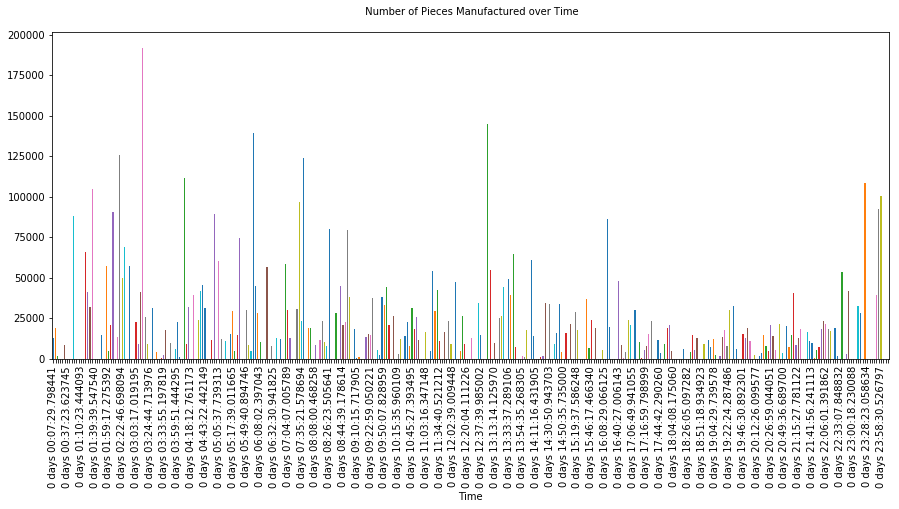

In [298]:
# plot Total Production over Time
from matplotlib.ticker import MultipleLocator
import matplotlib.dates as mdates

fig, axis = plt.subplots()
smart_data['NumberOfPieces'].plot(figsize=(15, 6), style='g', linewidth=2, kind = 'bar' )
plt.title("\n", fontsize=10)

every_nth = 6
for n, label in enumerate(axis.xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)
plt.title(" Number of Pieces Manufactured over Time\n", fontsize=10)
        #plt.grid(True)
plt.show()


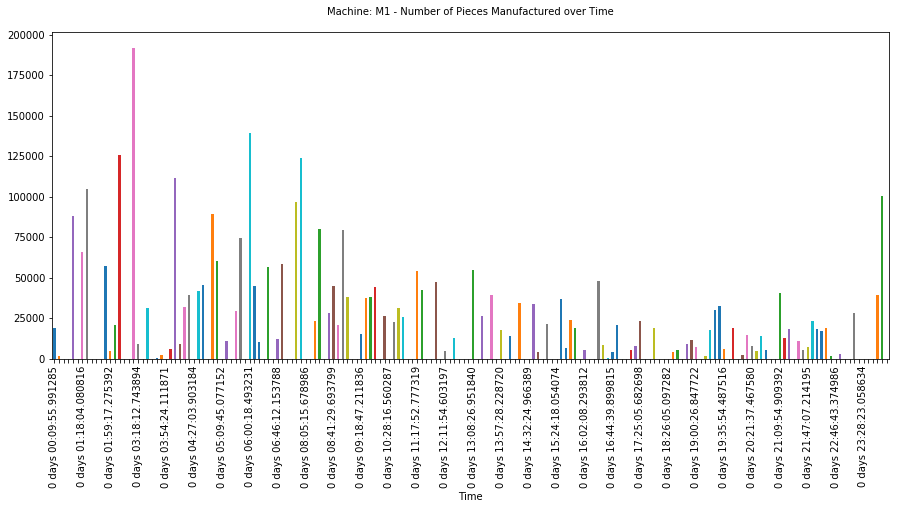

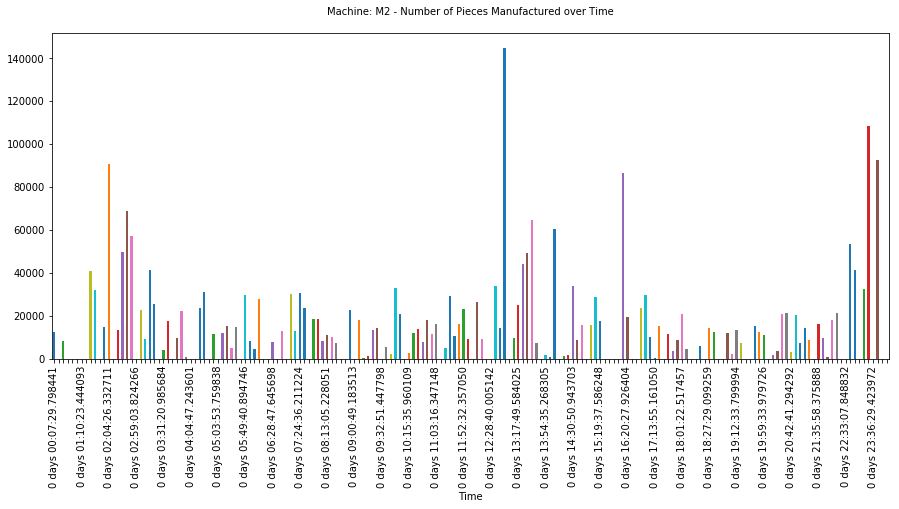

In [296]:
# plot M1 and M2 production over time
from matplotlib.ticker import MultipleLocator
import matplotlib.dates as mdates

for x in ['M1','M2']:
        machine = smart_data['Machine'] == x
        fig, axis = plt.subplots()
        smart_data[machine]['NumberOfPieces'].plot(figsize=(15, 6), style='g', linewidth=2, kind = 'bar' )
        plt.title("\n", fontsize=10)

        every_nth = 6
        for n, label in enumerate(axis.xaxis.get_ticklabels()):
            if n % every_nth != 0:
                label.set_visible(False)
        plt.title("Machine: "+x+" - Number of Pieces Manufactured over Time\n", fontsize=10)
        #plt.grid(True)
        plt.show()


## Q1: How does Machine M1 compare against M2 in terms of its production capacity?

In [121]:
# number of sensors by types
print(smart_data.groupby(['Machine'])['NumberOfPieces'].sum())

Machine
M1    3530401
M2    2674122
Name: NumberOfPieces, dtype: int64


In [302]:
print(smart_data.groupby(['Machine'])['Duration'].sum())

Machine
M1   11:04:38.863556
M2   12:54:44.050213
Name: Duration, dtype: timedelta64[ns]


In [301]:
print(smart_data[smart_data.StopType =='Run'].groupby(['Machine','StopType'])['Duration'].sum())

Machine  StopType
M1       Run        06:07:42.725027
M2       Run        08:41:29.229270
Name: Duration, dtype: timedelta64[ns]


M1 was able to produce more number of pieces than M2 in lesser productive (RUN) (non NPT) time.

## Q2: How do the 3 parts (P1, P2, P3) compare in terms of production complexity, based on this one day's data?

In [125]:
# number of sensors by types
print(smart_data.groupby(['Part','StopType'])['Duration'].sum())

Part  StopType  
P1    Alarm        00:33:30.655861
      ChangeOver   00:26:04.491432
      OpStop       01:20:45.062046
      Run          03:52:46.604817
P2    Alarm        01:24:12.891886
      ChangeOver   00:36:29.713427
      OpStop       02:07:07.450339
      Run          06:11:19.498964
P3    Alarm        01:05:46.952610
      ChangeOver   00:30:21.583433
      OpStop       01:05:52.158438
      Run          04:45:05.850516
Name: Duration, dtype: timedelta64[ns]


In [126]:
# number of sensors by types
print(smart_data.groupby(['Part'])['NumberOfPieces'].sum())

Part
P1     794559
P2    1810225
P3    3599739
Name: NumberOfPieces, dtype: int64


P1 has the least duration spent on Alarms Raised versus P2 and P3. 
P1 also has less "Run" time than P2 and P3. 
The ChangeOver as well as OpStop times were similar. 
So in order of increasing complexity: P1, P3 and then P2 

## Q3: How do the 5 operators compare, in terms of their individual production rates?


In [254]:
# create a dataframe for operator performance
operators = []
operators = pd.DataFrame(columns=['Pieces', 'Duration','Duration in seconds', 'ProductionRate (per sec)'])

In [255]:
# Number of pieces per operator
operators['Pieces'] = smart_data.groupby(['Operator'])['NumberOfPieces'].sum()

In [256]:
# Duration of time worked
operators['Duration'] =smart_data.groupby(['Operator'])['Duration'].sum()

In [257]:
# convert duration to seconds
operators['Duration in seconds'] = ((operators['Duration']).dt.seconds)

In [258]:
# calculate number of pieces made per second
operators['ProductionRate (per sec)'] = operators['Pieces'] / operators['Duration in seconds']

In [259]:
# view calculate comparison of operaor performance
operators.head()

,Pieces,Duration,Duration in seconds,ProductionRate (per sec)
Operator,,,,
Op_1,1811442,03:06:01.786805,11161,162.301048
Op_2,880750,04:51:44.093740,17504,50.317070
Op_3,1044542,04:00:14.621824,14414,72.467185
Op_4,1793372,08:02:59.956473,28979,61.885227
Op_5,674417,03:58:22.454927,14302,47.155433


It can be seen that Op_ 1 made the most Pieces in the least working time and so th highest production rate.
Then Op_3, Op_4, Op_2 and lastly Op_5

## Q4: What is the actual realized production rate, when taking into account all the stoppages?

In [206]:
# Total time ran with no stoppages
RunningTime = smart_data[smart_data.StopType == 'Run']['Duration'].sum()
RunningTime

Timedelta('0 days 14:49:11.954297')

In [207]:
# Total pieces made overall
TotalPieces = smart_data['NumberOfPieces'].sum()
TotalPieces

6204523

In [204]:
# Pieces made by Running Time
ProductionRate_Total = TotalPieces/RunningTime.seconds

In [215]:
# Calculated number of produced pieces by running run
print(str(ProductionRate_Total)  + " pieces per second")

116 pieces per second
